# **Tugas Akhir Kemal**


## Deep Learning

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Import Python Package

In [0]:
# tensorflow & keras
from __future__ import absolute_import, division, print_function, unicode_literals
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,MaxPooling2D,AveragePooling2D
from keras.applications import MobileNetV2
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Input, load_model
from keras.optimizers import Adam,SGD,Adagrad,RMSprop 
from keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
%load_ext tensorboard


#keperluan plot
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

#Explore data & Directory
import pandas as pd
import numpy as np
import os
from google.colab import files
from google.colab import drive
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import time

TensorFlow 2.x selected.


Using TensorFlow backend.


In [0]:
print(tf.__version__)

2.1.0


### Load Dataset


In [0]:
source = '/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/images'

### Explore data gambar

Explore data gambar disini bertujuan untuk eksplorasi gambar pada tiap-tiap kategori

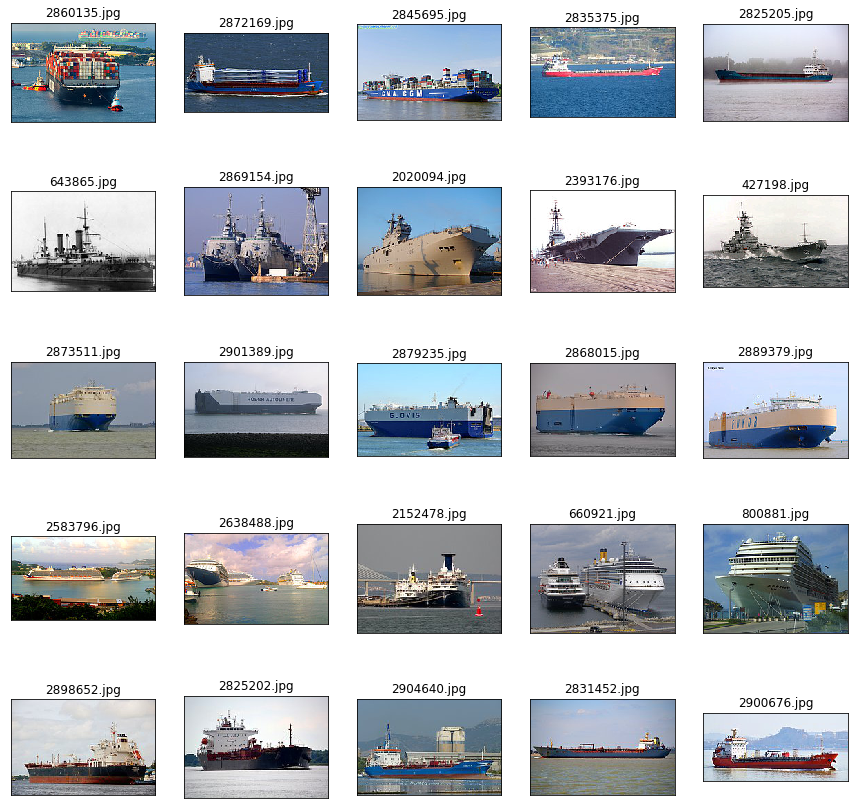

In [0]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
%matplotlib inline

BASE_DIR = '/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/' 
CSV_PATH = BASE_DIR + '/train.csv' 
IMAGE_DIR = BASE_DIR + '/images'

files = [[path+f for f in os.listdir(path)[:5]] for path in [f'/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/game_of_dl_ships/train/{x}/' for x in ['1', '2','3','4','5']]]

fig, axs = plt.subplots(5, 5, figsize=(15,15), subplot_kw={'xticks': [], 'yticks': []})

for ax, img in zip(axs.flatten(), [item for sublist in files for item in sublist]):
    ax.imshow(load_img(img))
    ax.set_title(img.split('/')[-1])

### Preprocessing data

Split data dengan membagi menjadi training, validasi, test 

Data training: berfungsi untuk melatih model
Data Validasi : berfungsi memvalidasi model
Data test: berfungsi untuk mengetahui seberapa baik model bekerja

In [0]:
train_dir = os.path.join('/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/game_of_dl_ships/train/')
val_dir = os.path.join('/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/game_of_dl_ships/val')
test_dir = os.path.join('/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/game_of_dl_ships/test')

### Generate data


pada proses ini semua gambar diubah ke dalam array, seperti pada saat explore data, hanya saja dilakukan untuk semua gambar dan secara otomatis

untuk data training, agar memperbanyak data training maka diperlukan manipulasi data dengan data augmentasi, yaitu memodifikasi data dengan berbagai cara seperti merotasi, membalik dan menggeser gambar

In [0]:
image_size = 224 # Semua gambar diubah kedalam 224 * 224
batch_size = 110

# ubah semua kode gambar dari 0-255 menjadi 0-1 (berfungsi untuk standarisasi dari data)
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255,
                # featurewise_center=True,
                # featurewise_std_normalization=True,
                # rotation_range=20,
                # width_shift_range=0.2,
                # height_shift_range=0.2,
                # horizontal_flip=True)
             
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)

# Generate data gambar menjadi array
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='sparse')

validation_generator = validation_datagen.flow_from_directory(
                val_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='sparse')


test_generator = test_datagen.flow_from_directory(
                test_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                shuffle=False, #mempermudah saat nanti klasifikasi mengunakan sklearn
                class_mode='sparse')

Found 4001 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Found 1251 images belonging to 5 classes.


In [0]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
%matplotlib inline

img_samples = 16
BASE_DIR = '/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/' 
CSV_PATH = BASE_DIR + '/train.csv' 
IMAGE_DIR = BASE_DIR + '/images'

image_dir = '/content/preview/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

img = load_img('/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/game_of_dl_ships/train/1/2812919.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

from itertools import islice
list(islice(train_datagen.flow(x, batch_size=1, save_to_dir='/content/preview', save_prefix='cat', save_format='jpeg'), img_samples));

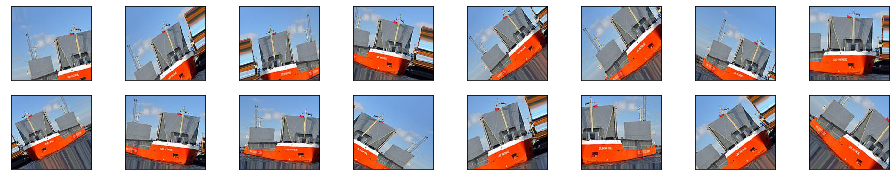

In [0]:
rows, cols = 2, img_samples // 2
fig, axs = plt.subplots(rows, cols, figsize=(16,3), subplot_kw={'xticks': [], 'yticks': []})

#for i, img in enumerate(os.listdir(image_dir)[:img_samples]):
#    axs[i//cols][i%cols].imshow(load_img(image_dir+img))

for ax, img in zip(axs.flatten(), os.listdir('/content/preview')[:img_samples]):
    ax.imshow(load_img('/content/preview/'+img))

## Load Pretrained Model

In [0]:
from keras.applications.vgg16 import VGG16

weights_vgg16 = '/content/drive/My Drive/BUAT TA/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
weights_mobilenet = '/content/drive/My Drive/BUAT TA/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.4_224_no_top.h5'

# mobilenet_model = tf.keras.applications.MobileNetV2(weights=weights_mobilenet, input_shape=(224, 224, 3),include_top=False, alpha=1.4)                          
# mobilenet_model1 = tf.keras.applications.MobileNetV2(weights=weights_mobilenet, input_shape=(224, 224, 3),include_top=False, alpha=1.4)
# mobilenet_model2 = tf.keras.applications.MobileNetV2(weights=weights_mobilenet, input_shape=(224, 224, 3),include_top=False, alpha=1.4)


VGG16_model = tf.keras.applications.VGG16(weights=weights_vgg16, input_shape = (224,224,3), include_top=False)
VGG16_model1 = tf.keras.applications.VGG16(weights=weights_vgg16, input_shape = (224,224,3), include_top=False)
VGG16_model2 = tf.keras.applications.VGG16(weights=weights_vgg16, input_shape = (224,224,3), include_top=False)

## Menggunakan *fine-tunning* kedalam model

VGG 16

In [0]:
VGG16_model2.trainable = True
VGG16_model1.trainable = True

from_layer = int(len(VGG16_model1.layers)/2)

for layer in VGG16_model1.layers[:from_layer]:
    layer.trainable =  False

MobileNet

In [0]:
# mobilenet_model2.trainable = True
# mobilenet_model1.trainable = True

# from_layer = int(len(mobilenet_model1.layers)/2)

# for layer in mobilenet_model1.layers[:from_layer]:
#     layer.trainable =  False

## Menambahkan FullyConnected Layer

In [0]:
# # # MobileNet
# x1 = tf.keras.layers.GlobalAveragePooling2D()(mobilenet_model.output)
# output1 = tf.keras.layers.Dense(5, activation='softmax')(x1)

# # # define new model
# model = tf.keras.Model(mobilenet_model.inputs, output1)
# Model_mobile = tf.keras.Sequential()
# Model_mobile.add(model)

# x = tf.keras.layers.GlobalAveragePooling2D()(mobilenet_model1.output)
# output = tf.keras.layers.Dense(5, activation='softmax')(x)

# # # define new model
# model_x = tf.keras.Model(mobilenet_model1.inputs, output)
# Model_mobile1 = tf.keras.Sequential()
# Model_mobile1.add(model_x)

# x = tf.keras.layers.GlobalAveragePooling2D()(mobilenet_model2.output)
# output = tf.keras.layers.Dense(5, activation='softmax')(x)

# # # define new model
# model_x = tf.keras.Model(mobilenet_model2.inputs, output)
# Model_mobile2 = tf.keras.Sequential()
# Model_mobile2.add(model_x)


# VGG
x = tf.keras.layers.GlobalAveragePooling2D()(VGG16_model.output)
output = tf.keras.layers.Dense(5, activation='softmax')(x)

# define new model

model_x = tf.keras.Model(VGG16_model.inputs, output)
Model_vgg = tf.keras.Sequential()
Model_vgg.add(model_x)

# VGG
x = tf.keras.layers.GlobalAveragePooling2D()(VGG16_model1.output)
output = tf.keras.layers.Dense(5, activation='softmax')(x)

# define new model

model_x = tf.keras.Model(VGG16_model1.inputs, output)
Model_vgg1 = tf.keras.Sequential()
Model_vgg1.add(model_x)

# VGG
x = tf.keras.layers.GlobalAveragePooling2D()(VGG16_model2.output)
output = tf.keras.layers.Dense(5, activation='softmax')(x)

# define new model

model_x = tf.keras.Model(VGG16_model2.inputs, output)
Model_vgg2 = tf.keras.Sequential()
Model_vgg2.add(model_x)

In [0]:
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
name_mobile = source + "Checkpoint Mobilenet {}.h5".format(int(time.time()))
name_vgg = source + "Checkpoint VGG {}.h5".format(int(time.time()))
cp_mobile = [ModelCheckpoint(name_mobile, monitor='val_acc', save_best_only=True,mode='max', period=1)]
cp_vgg = [ModelCheckpoint(name_vgg, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max',period=1)]
tb_mobile = [keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 5)                 14717253  
Total params: 14,717,253
Trainable params: 14,717,253
Non-trainable params: 0
_________________________________________________________________


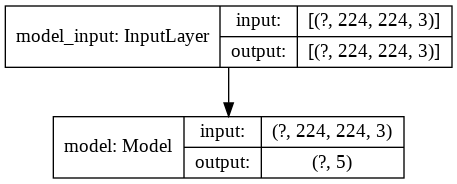

In [0]:
#Plot model
# Model_mobile2.summary()
Model_vgg.summary()
keras.utils.plot_model(Model_vgg, "arsi_mod_mobile.png", show_shapes=True)

In [0]:
# # Plot model
# Model_vgg2.summary()
# keras.utils.plot_model(Model_vgg, "arsi_mod_vgg.png", show_shapes=True)

# Compile

In [0]:
Model_vgg.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
Model_vgg1.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
Model_vgg2.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model_mobile.compile(optimizer=keras.optimizers.Adam(0.0001),
#               loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# Model_mobile1.compile(optimizer=keras.optimizers.Adam(0.0001),
#               loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# Model_mobile2.compile(optimizer=keras.optimizers.Adam(0.0001),
#               loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [0]:
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size
compile_vgg = Model_vgg.fit(train_generator,
                    steps_per_epoch = steps_per_epoch,
                    validation_data=validation_generator,
                    epochs=10,
                    shuffle=False,
                    callbacks=tb_mobile)

# compile_mobile = Model_mobile.fit(train_generator,
#                     steps_per_epoch = steps_per_epoch,
#                     validation_data=validation_generator,
#                     epochs=10,
#                     shuffle=False,
#                     callbacks=tb_mobile)

In [0]:
compile_vgg1 = Model_vgg1.fit(train_generator,
                    steps_per_epoch = steps_per_epoch,
                    validation_data=validation_generator,
                    epochs=10,
                    shuffle=False,
                    callbacks=tb_mobile)
# compile_mobile1 = Model_mobile1.fit(train_generator,
#                     steps_per_epoch = steps_per_epoch,
#                     validation_data=validation_generator,
#                     epochs=10,
#                     shuffle=False,
#                     callbacks=tb_mobile)

In [0]:
compile_vgg2 = Model_vgg2.fit(train_generator,
                    steps_per_epoch = steps_per_epoch,
                    validation_data=validation_generator,
                    epochs=10,
                    shuffle=False,
                    callbacks=tb_mobile)
# compile_mobile2 = Model_mobile2.fit(train_generator,
#                     steps_per_epoch = steps_per_epoch,
#                     validation_data=validation_generator,
#                     epochs=10,
#                     shuffle=False,
#                     callbacks=tb_mobile)

Menyimpan Model

In [0]:
Model_mobile.save("/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/Checkpoint/Checkpoint Epoch 30 mobile 0 {}.h5".format(int(time.time())))
Model_mobile1.save("/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/Checkpoint/Checkpoint Epoch 30 mobile 50 {}.h5".format(int(time.time())))
Model_mobile2.save("/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/Checkpoint/Checkpoint Epoch 30 mobile 100 {}.h5".format(int(time.time())))

# Model_mobile.save("/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/Checkpoint/Checkpoint Learning Rate 0.01 mobile 0 {}.h5".format(int(time.time())))
# Model_mobile1.save("/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/Checkpoint/Checkpoint Learning Rate 0.01 mobile 50 {}.h5".format(int(time.time())))
# Model_mobile2.save("/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/Checkpoint/Checkpoint Learning Rate 0.01 mobile 100 {}.h5".format(int(time.time())))

In [0]:
# from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
# model = load_model('model.h5')
Model_vgg_best = load_model('/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/Checkpoint/Checkpoint Learning Rate 0.0001 vgg 100 1577442899.h5')
Model_mobile_best =  load_model('/content/drive/My Drive/BUAT TA/GAME OF DEEP LEARNING/input/train/Checkpoint/Learning Rate/Mobile/Checkpoint Learning Rate 0.0001 mobile 100 1577408879.h5')
# Model_mobile2 =

## Visualisasi Hasil Trainning

In [0]:
acc = compile_vgg.history['accuracy']
val_acc =compile_vgg.history['val_accuracy']
loss = compile_vgg.history['loss']
val_loss = compile_vgg.history['val_loss']

# acc = compile_mobile.history['accuracy']
# val_acc =compile_mobile.history['val_accuracy']
# loss = compile_mobile.history['loss']
# val_loss = compile_mobile.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy',color='b', linewidth= 2)
plt.plot(val_acc, label='Validation Accuracy',color='r', linewidth= 2)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss',color='b', linewidth= 2)
plt.plot(val_loss, label='Validation Loss',color='r', linewidth= 2)
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [0]:
acc = compile_vgg1.history['accuracy']
val_acc =compile_vgg1.history['val_accuracy']
loss = compile_vgg1.history['loss']
val_loss = compile_vgg1.history['val_loss']

# acc = compile_mobile1.history['accuracy']
# val_acc =compile_mobile1.history['val_accuracy']
# loss = compile_mobile1.history['loss']
# val_loss = compile_mobile1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy',color='b', linewidth= 2)
plt.plot(val_acc, label='Validation Accuracy',color='r', linewidth= 2)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss',color='b', linewidth= 2)
plt.plot(val_loss, label='Validation Loss',color='r', linewidth= 2)
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [0]:
acc = compile_vgg2.history['accuracy']
val_acc =compile_vgg2.history['val_accuracy']
loss = compile_vgg2.history['loss']
val_loss = compile_vgg2.history['val_loss']

# acc = compile_mobile2.history['accuracy']
# val_acc =compile_mobile2.history['val_accuracy']
# loss = compile_mobile2.history['loss']
# val_loss = compile_mobile2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy',color='b', linewidth= 2)
plt.plot(val_acc, label='Validation Accuracy',color='r', linewidth= 2)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss',color='b', linewidth= 2)
plt.plot(val_loss, label='Validation Loss',color='r', linewidth= 2)
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

### Test data: Classification

In [0]:
# # Test data
# Model_vgg.evaluate(test_generator)
# Model_vgg1.evaluate(test_generator)
# Model_vgg2.evaluate(test_generator)

Model_mobile.evaluate(test_generator)
Model_mobile1.evaluate(test_generator)
Model_mobile2.evaluate(test_generator)

In [0]:
Model_vgg_best.evaluate(test_generator)
Model_mobile_best.evaluate(test_generator)


KeyboardInterrupt: ignored

In [0]:
pred=Model_vgg.predict_classes(test_generator,batch_size=None)
y_pred=np.array([0]*436+[1]*240+[2]*160+[3]*159+[4]*256)

# pred=Model_mobile.predict_classes(test_generator,batch_size=None)
# y_pred=np.array([0]*436+[1]*240+[2]*160+[3]*159+[4]*256)

In [0]:
# Confusion Matrix
target_names = ['Cargo','Military','Carrier','Cruise','Tankers']
print(classification_report(y_pred,pred, target_names=target_names))

In [0]:
# Klasifikasi data test
def plot_confusion_matrix(y_true, y_pred, classes,normalize=True,title=None,cmap=plt.cm.PuBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[:5]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)


    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_pred, pred, classes=['Cargo','Military','Carrier','Cruise','Tankers'],
                      title='Confusion matrix')

plt.show()

In [0]:
pred=Model_vgg1.predict_classes(test_generator,batch_size=None)
y_pred=np.array([0]*436+[1]*240+[2]*160+[3]*159+[4]*256)

# pred=Model_mobile1.predict_classes(test_generator,batch_size=None)
# y_pred=np.array([0]*436+[1]*240+[2]*160+[3]*159+[4]*256)

In [0]:
# Confusion Matrix
target_names = ['Cargo','Military','Carrier','Cruise','Tankers']
print(classification_report(y_pred,pred, target_names=target_names))

In [0]:
# Klasifikasi data test
def plot_confusion_matrix(y_true, y_pred, classes,normalize=True,title=None,cmap=plt.cm.PuBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[:5]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)


    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_pred, pred, classes=['Cargo','Military','Carrier','Cruise','Tankers'],
                      title='Confusion matrix')

plt.show()

In [0]:
pred=Model_vgg2.predict_classes(test_generator,batch_size=None)
y_pred=np.array([0]*436+[1]*240+[2]*160+[3]*159+[4]*256)

# pred=Model_mobile2.predict_classes(test_generator,batch_size=None)
# y_pred=np.array([0]*436+[1]*240+[2]*160+[3]*159+[4]*256)

In [0]:
# Confusion Matrix
target_names = ['Cargo','Military','Carrier','Cruise','Tankers']
print(classification_report(y_pred,pred, target_names=target_names))

In [0]:
# Klasifikasi data test
def plot_confusion_matrix(y_true, y_pred, classes,normalize=True,title=None,cmap=plt.cm.PuBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[:5]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)


    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_pred, pred, classes=['Cargo','Military','Carrier','Cruise','Tankers'],
                      title='Confusion matrix')

plt.show()

### Test Data: Predicting

In [0]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = Model_mobile_best.predict_classes(images)
  print(fn)
  print(classes)

Saving 2829275.jpg to 2829275.jpg
2829275.jpg
[0]


In [0]:
%tensorboard --logdir='/content/logs'